In [1]:
import numpy as np
import os
from skimage.io import imread, imsave
from skimage.transform import rotate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from gt_map import GTMap
gt_map_file = '/home/kirill/TopoSLAM/GT/2n8kARJN3HM/map_cropped_0_600_300_900.png'
gt_map = GTMap(gt_map_file)
gt_map_image = imread(gt_map_file)

In [3]:
import sys
sys.path.append('/home/kirill/TopoSLAM/toposlam_ws/src/simple_toposlam_model/scripts')

from localization import Localizer
from astar_planner import AStarPlanner
from topo_graph import TopologicalGraph
from dijkstra import dijkstra

In [6]:
from tqdm import tqdm_notebook

def path_length(path):
        result = 0
        for i in range(1, len(path)):
            result += np.sqrt((path[i][0] - path[i - 1][0]) ** 2 + (path[i][1] - path[i - 1][1]) ** 2)
        return result

def get_spl(graph, gt_map, trajectory, N=1000):
    astar_planner = AStarPlanner(gt_map.gt_map)
    localizer = Localizer(graph, gt_map)
    free_cells = np.array((gt_map.gt_map == 255).nonzero()).T
    values = []
    adj_list = {}
    for u in range(len(graph.adj_lists)):
        adj_list[u] = []
        for v in graph.adj_lists[u]:
            vertex_u = graph.get_vertex(u)
            vertex_v = graph.get_vertex(v)
            length = np.sqrt((vertex_u[0] - vertex_v[0]) ** 2 + (vertex_u[1] - vertex_v[1]) ** 2)
            adj_list[u].append((v, length))
    for i in tqdm_notebook(range(N)):
        start = trajectory[np.random.randint(trajectory.shape[0])]
        start_i = int(start[1] * 20 + 480 - gt_map.start_i)
        start_j = int(start[0] * 20 + 480 - gt_map.start_j)
        goal = free_cells[np.random.randint(free_cells.shape[0])]
        goal_i, goal_j = goal
        #print(start_i, start_j, goal_i, goal_j)
        shortest_path = astar_planner.create_path((start_i, start_j), (goal_i, goal_j))
        if shortest_path is None:
            #print('No shortest path from ({}, {}) to ({}, {})!'.format(start_i, start_j, goal_i, goal_j))
            continue
        if len(shortest_path) == 0:
            #print('Empty shortest path from ({}, {}) to ({}, {})!'.format(start_i, start_j, goal_i, goal_j))
            continue
        vertex_ids, rel_poses, dists = localizer.localize(start[0], start[1], 0)
        if len(dists) == 0:
            continue
        dist_from_start = dists[0]
        u = vertex_ids[0]
        goal_x = (goal[1] - 480 + gt_map.start_j) / 20
        goal_y = (goal[0] - 480 + gt_map.start_i) / 20
        vertex_ids, rel_poses, dists = localizer.localize(goal_x, goal_y, 0)
        if len(dists) == 0:
            #print('({}, {}) Not localized!'.format(goal_x, goal_y))
            continue
        dist_to_finish = dists[0]
        v = vertex_ids[0]
        topo_path_length, topo_path = dijkstra(adj_list, u, [v])
        #print('Shortest path:', shortest_path)
        #print('Topo path:', topo_path)
        values.append(path_length(shortest_path) * 0.05 / (dist_from_start + topo_path_length + dist_to_finish))
        #print(values[-1])
    return np.mean(values)#, shortest_path, topo_path

<ipython-input-6-a06669ca1b71>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(N)):


One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in obstacle
One of ends in o

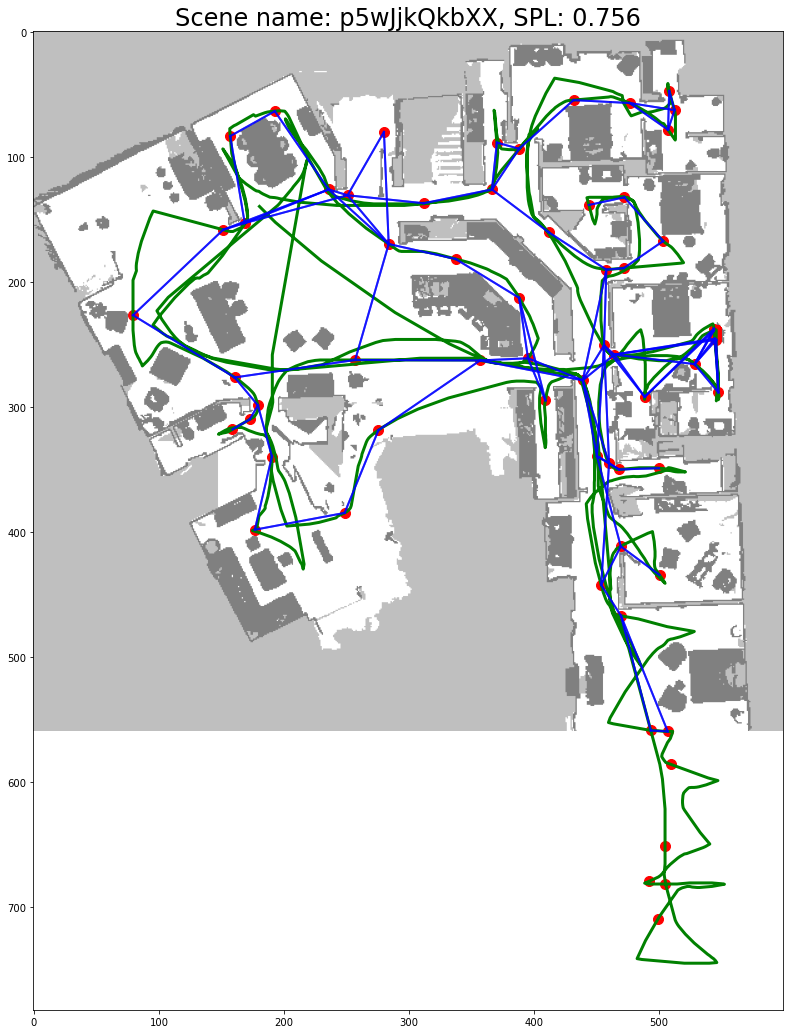

In [9]:
#scene_name = '2n8kARJN3HM'
iou_threshold = 0.25
scene_names = os.listdir('/home/kirill/TopoSLAM/GT')
scene_names.sort()
for scene_name in scene_names[12:13]:#::4]:
    gt_map_dir = '/home/kirill/TopoSLAM/GT/{}'.format(scene_name)
    gt_map_filename = [x for x in os.listdir(gt_map_dir) if x.startswith('map_cropped_')][0]
    gt_map_file = os.path.join(gt_map_dir, gt_map_filename)
    gt_map = GTMap(gt_map_file)
    gt_map_image = imread(gt_map_file)
    graph = TopologicalGraph()
    path_to_json = '/home/kirill/TopoSLAM/toposlam_ws/src/simple_toposlam_model/graph_jsons_new/{}_{}.json'.format(scene_name, iou_threshold)
    graph.load_from_json(path_to_json)
    positions = np.loadtxt('/home/kirill/TopoSLAM/IncrementalTopo/experiment1_large_noise/{}/positions.txt'.format(scene_name))
    i = positions.shape[0] - 1
    while i > 0 and (positions[i] == positions[i - 1]).all():
        i -= 1
    positions = positions[:i]
    positions_ij = positions * 20 + 480 - [gt_map.start_j, gt_map.start_i]
    spl = get_spl(graph, gt_map, positions)
    
    plt.figure(figsize=(18, 18))
    plt.imshow(gt_map_image, cmap='gray', alpha=0.5)
    for x, y, theta in graph.vertices:
        i = y * 20 + 480 - gt_map.start_i
        j = x * 20 + 480 - gt_map.start_j
        plt.scatter([j], [i], color='r', s=100)
    plt.plot(positions_ij[:, 0], positions_ij[:, 1], color='g', lw=3)
    for u in range(len(graph.adj_lists)):
        for v in graph.adj_lists[u]:
            x1, y1, theta = graph.vertices[u]
            x2, y2, theta = graph.vertices[v]
            i1 = y1 * 20 + 480 - gt_map.start_i
            j1 = x1 * 20 + 480 - gt_map.start_j
            i2 = y2 * 20 + 480 - gt_map.start_i
            j2 = x2 * 20 + 480 - gt_map.start_j
            plt.plot([j1, j2], [i1, i2], color='b', lw=2, alpha=0.7)
    plt.title('Scene name: {}, SPL: {}'.format(scene_name, np.round(spl, 3)), fontsize=24)
    plt.savefig('graph_pics/{}_0.25.png'.format(scene_name))
    plt.show()

In [ ]:
spl